## Linear regression 

Our energy consumption for a residential house dataset, "utility.dat.txt", shows a linear correlation between the mean monthly temperature in degrees and the number of days when the heating was used. We can apply the linear regression model from the Scikit-learn library and calculate the coefficients of the correlation and the mean squared error. 

### 1. Importing Python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Importing data

To import data into a data frame (df),  we have created a module of reusable functions (functions_library.py), which we can import into the Jupyter notebook. 

In [2]:
import functions_library

filename = '../data/utility.dat.txt'
df = functions_library.read_input(filename)

#selecting x and y columns 
df_monthly_temp = df[['temp_month','days_heating']]

df_monthly_temp.head(5)

,temp_month,days_heating
date,,
Sep-90,16.67,128
Oct-90,13.33,299
Nov-90,7.22,603
Dec-90,2.78,866
Jan-91,-2.78,1171


### 3. Preparing training and testing data sets

75% of the input data is included in the training data set and 25% is part of the testing data set. Both, the train and the test data sets are organized as matrixes, or 2D NumPy arrays, required by the Scikit learn .fit() method. We can use the NumPy .reshape() function to change the dimension of the arrays and check the result using ndarray.shape(). The 2D array will be displayed as a tuple of two integers, each indicating the number of elements stored in each dimension of the array. For example, the training data set is a NumPy array of 1 column and 61 rows. 

In [3]:
#split the data into X and y components
monthly_temp_X = df_monthly_temp['temp_month'].values
monthly_temp_y = df_monthly_temp['days_heating'].values

#split the data into training and testing sets
monthly_temp_X_train = monthly_temp_X[:-20].reshape(-1,1)
monthly_temp_X_test = monthly_temp_X[-20:].reshape(-1,1)

#split the targets into training and testing sets
monthly_temp_y_train = monthly_temp_y[:-20].reshape(-1,1)
monthly_temp_y_test = monthly_temp_y[-20:].reshape(-1,1)

print('Training dataset...')
print(monthly_temp_X_train.shape)
print('Testing dataset...')
print(monthly_temp_X_test.shape)

Training dataset...
(61, 1)
Testing dataset...
(20, 1)


### 4. Creating a linear regression model 

In [4]:
from sklearn import linear_model

#create linear regression object
regr = linear_model.LinearRegression()

#train the model using the training set
regr.fit(monthly_temp_X_train, monthly_temp_y_train)

#predict using the testing set
monthly_temp_y_pred = regr.predict(monthly_temp_X_test)

### 5. Calculating the coefficients and errors of the model 

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', regr.coef_, regr.intercept_)

print('Mean squared error: %.2f' % mean_squared_error(monthly_temp_y_test, monthly_temp_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(monthly_temp_y_test, monthly_temp_y_pred))

print(regr.score(monthly_temp_X_test, monthly_temp_y_test ))

Coefficients: [[-43.32042001]] [912.17103421]
Mean squared error: 3927.98
Coefficient of determination: 0.97
0.9717879399365238


### 6. Plotting the linear regression

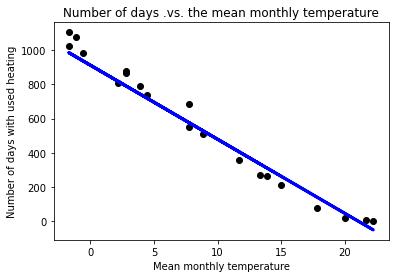

In [6]:
plt.scatter(monthly_temp_X_test, monthly_temp_y_test,  color='black')
plt.plot(monthly_temp_X_test, monthly_temp_y_pred, color='blue', linewidth=3)

plt.title('Number of days .vs. the mean monthly temperature')
plt.ylabel('Number of days with heating')
plt.xlabel('Mean monthly temperature')
plt.show()

### 7. Exploring the training dataset

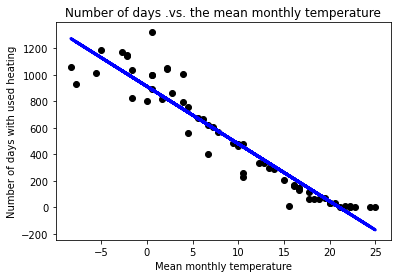

In [7]:
monthly_temp_y_train_pred = regr.predict(monthly_temp_X_train)

plt.scatter(monthly_temp_X_train, monthly_temp_y_train,  color='black')
plt.plot(monthly_temp_X_train, monthly_temp_y_train_pred, color='blue', linewidth=3)

plt.title('Number of days .vs. the mean monthly temperature')
plt.ylabel('Number of days with heating')
plt.xlabel('Mean monthly temperature')
plt.show()